In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
train_df=pd.read_csv("train.csv") 

In [3]:
train_df.drop('LoanID', axis=1, inplace=True)     #dropping unnecessary columns

In [ ]:
le = LabelEncoder()     #Label Encoding to convert all feature values into numerical values

for col in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']:
    train_df[col] = le.fit_transform(train_df[col])

In [ ]:
# Split data into features (X) and target (y)
X = train_df.drop('Default', axis=1)
y = train_df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51) # 80% train, 20% test

In [ ]:
#Applying GridsearchCV (for GradientBoosting Classifier) to find best parameters

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'min_samples_split': [2, 5]
}

gb_classifier = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

best_gb_classifier = grid_search.best_estimator_
accuracy = best_gb_classifier.score(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.8857184813341556
Test Accuracy: 0.8869688662619933


In [ ]:
test_df=pd.read_csv("test.csv")

In [ ]:
le = LabelEncoder()

for col in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']:
    test_df[col] = le.fit_transform(test_df[col])

In [11]:
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,CKV34LU7V7,55,112656,92393,581,113,2,23.54,36,0.15,3,2,2,1,1,3,0
1,62KTYNH93J,56,91569,131575,641,54,1,15.19,12,0.43,1,1,0,1,1,2,1
2,JGFUSOIUH7,26,78169,75417,569,105,3,18.02,12,0.29,2,1,1,1,1,2,1
3,4538THBHOX,26,63033,10804,326,118,1,14.71,24,0.41,1,1,2,0,0,1,1
4,DXLNA06JHR,24,29665,21182,662,102,3,15.02,60,0.69,3,3,2,0,1,1,1


In [12]:
y_train = train_df['Default']
X_train = train_df.drop('Default', axis=1)
X_test = test_df.drop('LoanID', axis=1)

In [ ]:
best_gb_classifier = GradientBoostingClassifier(**best_params, random_state=51)

best_gb_classifier.fit(X_train, y_train)

y_pred = best_gb_classifier.predict(X_test)

submission_df = pd.DataFrame({'LoanID': test_df['LoanID'], 'Default': y_pred})

submission_df.to_csv('submission.csv', index=False)
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Feature Selection -- feature_importances

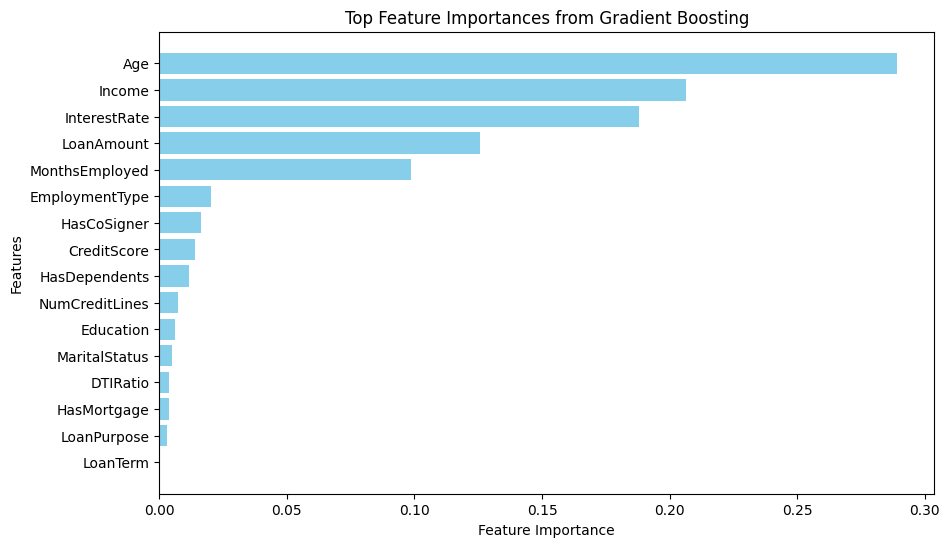

In [ ]:

best_gb_classifier = GradientBoostingClassifier(**best_params, random_state=51)

best_gb_classifier.fit(X_train, y_train)

import matplotlib.pyplot as plt
import numpy as np

feature_importances = best_gb_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

top_n = 20
top_features = X_train.columns[sorted_indices][:top_n]
top_importances = feature_importances[sorted_indices][:top_n]

plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top Feature Importances from Gradient Boosting")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#Dropping LoanTerm also

train_df=pd.read_csv("train.csv")

In [ ]:
train_df.drop(['LoanID', 'LoanTerm'], axis=1, inplace=True)

In [ ]:
le = LabelEncoder()

for col in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']:
    train_df[col] = le.fit_transform(train_df[col])

In [ ]:
X = train_df.drop('Default', axis=1)
y = train_df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51) 

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'min_samples_split': [2, 5]
}

gb_classifier = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

best_gb_classifier = grid_search.best_estimator_
accuracy = best_gb_classifier.score(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.8857551966962687
Test Accuracy: 0.8870422948893676


In [ ]:
test_df=pd.read_csv("test.csv") 

In [ ]:
le = LabelEncoder()

for col in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']:
    test_df[col] = le.fit_transform(test_df[col])

In [26]:
y_train = train_df['Default']
X_train = train_df.drop('Default', axis=1)
X_test = test_df.drop(['LoanID', 'LoanTerm'], axis=1)

In [ ]:
best_gb_classifier = GradientBoostingClassifier(**best_params, random_state=51)

best_gb_classifier.fit(X_train, y_train)

y_pred = best_gb_classifier.predict(X_test)

submission_df = pd.DataFrame({'LoanID': test_df['LoanID'], 'Default': y_pred})

submission_df.to_csv('submission.csv', index=False)
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Dropping more features

train_df=pd.read_csv("train.csv")

In [ ]:
train_df.drop(['LoanID', 'LoanTerm', 'LoanPurpose', 'HasMortgage', 'DTIRatio'], axis=1, inplace=True)   

In [ ]:
le = LabelEncoder()

for col in ['Education', 'EmploymentType', 'MaritalStatus', 'HasDependents', 'HasCoSigner']:
    train_df[col] = le.fit_transform(train_df[col])

In [ ]:
X = train_df.drop('Default', axis=1)
y = train_df['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'min_samples_split': [2, 5]
}

gb_classifier = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

best_gb_classifier = grid_search.best_estimator_
accuracy = best_gb_classifier.score(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.8856817658222659
Test Accuracy: 0.8871401997258664


In [ ]:
test_df=pd.read_csv("test.csv") 

In [ ]:

le = LabelEncoder()

for col in ['Education', 'EmploymentType', 'MaritalStatus', 'HasDependents', 'HasCoSigner']:
    test_df[col] = le.fit_transform(test_df[col])

In [40]:
y_train = train_df['Default']
X_train = train_df.drop('Default', axis=1)
X_test = test_df.drop(['LoanID', 'LoanTerm', 'LoanPurpose', 'HasMortgage', 'DTIRatio'], axis=1)

In [ ]:
best_gb_classifier = GradientBoostingClassifier(**best_params, random_state=51)

best_gb_classifier.fit(X_train, y_train)

y_pred = best_gb_classifier.predict(X_test)

submission_df = pd.DataFrame({'LoanID': test_df['LoanID'], 'Default': y_pred})

submission_df.to_csv('submission.csv', index=False)
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>